Wine Quality Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Predicting the Quality of Red Wines

By: Jaskaran Singh, Justin Wong, Matthew Gillies, Shehab Khan

# Introduction

For those who drink wine, knowing the quality of the wine is often very important to them. In our study, we look at four factors to predict whether the quality of wine out of 10. Our data set contains 1599 red wines with data on their acidity, composition, density, and quality. First, we will identify the 4 factors with the highest correlations to quality. To ensure that these factors do have a postive correlation with the quality of the wine, we will perform a hypothesis test and obtain a confidence interval regarding the correlatons. Using these factors we will predict the quality of the wines.

-2 parameters?
-frame question based on papers.

# Preliminary Results

In [1]:
install.packages("cowplot")
install.packages("tidymodels")
library(cowplot)
library(digest)
library(gridExtra)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(infer)


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tune’, ‘workflowsets’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.4 ──

✔ broom

In [2]:
wine_quality <- read_delim('winequality-red.csv', show_col_types = FALSE)
names(wine_quality) <- make.names(names(wine_quality), unique = TRUE)



red_wine_alc_mean <- wine_quality %>% 
    summarize(mean = mean(alcohol))


head(wine_quality)
red_wine_alc_mean

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


mean
<dbl>
10.42298


In [3]:
wine_quality_white <- read_delim('winequality-white.csv', show_col_types = FALSE)
names(wine_quality_white) <- make.names(names(wine_quality_white), unique = TRUE)


white_wine_alc_mean <- wine_quality_white %>% 
    summarize(mean = mean(alcohol))

head(wine_quality_white)
white_wine_alc_mean



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


mean
<dbl>
10.51427


### UNIVARIATE ANALYSIS

For this analysis, we took bootstrap samples for each of the variables individually to check which of them deem neccessary for our analysis. 

replicate,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.0,0.690,0.00,2.4,0.088,19,38,0.99900,3.35,0.60,9.3,5
1,7.2,0.695,0.13,2.0,0.076,12,20,0.99546,3.29,0.54,10.1,5
1,9.4,0.615,0.28,3.2,0.087,18,72,1.00010,3.31,0.53,9.7,5
1,9.1,0.280,0.48,1.8,0.067,26,46,0.99670,3.32,1.04,10.6,6
1,12.8,0.840,0.63,2.4,0.088,13,35,0.99970,3.10,0.60,10.4,6
1,6.7,0.280,0.28,2.4,0.012,36,100,0.99064,3.26,0.39,11.7,7


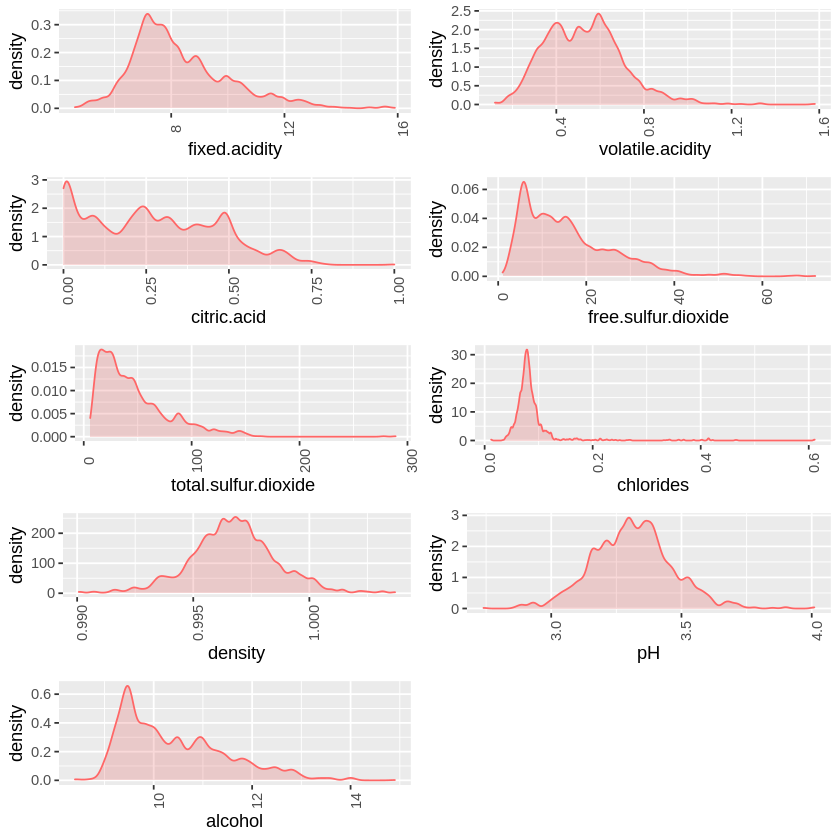

In [19]:
# We check first for wine_quality 
wine_quality_bootstrap <- wine_quality %>% 
    rep_sample_n(size = 40, reps = 2000, replace = TRUE)

wine_quality_hist_fixed <- wine_quality_bootstrap %>% 
    ggplot(aes(x = fixed.acidity)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666") 

wine_quality_hist_volatile <- wine_quality_bootstrap %>% 
    ggplot(aes(x = volatile.acidity)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.1) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_citric <- wine_quality_bootstrap %>% 
    ggplot(aes(x = citric.acid)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.04) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_sulfur <- wine_quality_bootstrap %>% 
    ggplot(aes(x = free.sulfur.dioxide)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_sulfur_total <- wine_quality_bootstrap %>% 
    ggplot(aes(x = total.sulfur.dioxide)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_chlorides <- wine_quality_bootstrap %>% 
    ggplot(aes(x = chlorides)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_density <- wine_quality_bootstrap %>% 
    ggplot(aes(x = density)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.02) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_ph <- wine_quality_bootstrap %>% 
    ggplot(aes(x = pH)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.04) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_sulphates <- wine_quality_bootstrap %>% 
    ggplot(aes(x = sulphates)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_alcohol <- wine_quality_bootstrap %>% 
    ggplot(aes(x = alcohol)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.07) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

head(wine_quality_bootstrap)

all_plots_row <- plot_grid(wine_quality_hist_fixed + 
                           theme(axis.text.x = element_text(angle = 90)),

                           wine_quality_hist_volatile +  
                           theme(axis.text.x = element_text(angle = 90)), 
                        
                           wine_quality_hist_citric +
                           theme(axis.text.x = element_text(angle = 90)), 

                           wine_quality_hist_sulfur + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_sulfur_total + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_chlorides + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_density + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_ph + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_alcohol + 
                           theme(axis.text.x = element_text(angle = 90)),
                           ncol = 2)

means_grid <- plot_grid(all_plots_row, 
                        rel_heights = c(0.5, 1))
    
means_grid

Based on the univariate graphs, we can see that on taking bootstrap samples, fixed acidity and volatile acidity follow a somewhat normal distribution wherein the histogram for volatile acidity follows a somewhat bimodal distribution. 

It can be seen that pH and density follows an almost perfect normal distribution while total and free sulfur dioxide follow a right skewed distribution. This suggests that the variables fixed acidity, volatile acidity, pH, and density should be our ideal variables for our analysis to predict the quality of the wine. 



In [ ]:
# Now we split data into a 75:25 training and testing data, which is then scaled and centered 
# to make sure all variables are comparable

wine_split <- initial_split(wine_quality, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_recipe <- recipe(quality ~ . , data = wine_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

wine_scaled <- wine_recipe %>%
            prep() %>%
            bake(wine_train)


In [ ]:
options(repr.plot.width = 15, repr.plot.height = 12)
ggpairs(wine_scaled) + 
     ggtitle("Figure 1: Correlation Matrix Between Pairs of Variables")

# Methods and Results

## Hypothesis Test
H<sub>0</sub> : There is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine

H<sub>A</sub> : There is significant difference between average alcohol amount in red wine and average alcohol amount in white wine

In [ ]:
# Step 1: We take a bootstrap sample for alcohol from the red wine dataset
red_wine_alcohol_bootstrap_sample <- wine_quality %>% 
    rep_sample_n(size = 50, reps = 2000, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(mean_alcohol_red = mean(alcohol))

red_wine_mean <- red_wine_alcohol_bootstrap_sample %>% 
    summarize(mean_red = mean(mean_alcohol_red))

# Step 2: We take a bootstrap sample for alochol from the white wine dataset
white_wine_alcohol_bootstrap_sample <- wine_quality_white %>% 
    rep_sample_n(size = 50, reps = 2000, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(mean_alcohol_white = mean(alcohol))

white_wine_mean <- white_wine_alcohol_bootstrap_sample %>% 
    summarize(mean_white = mean(mean_alcohol_white))

#head(red_wine_alcohol_bootstrap_sample)
#head(white_wine_alcohol_bootstrap_sample)

red_wine_mean
white_wine_mean




In [ ]:
# Now we would again take a simulation from the null distribution. We would use the infer workflow, generate 
# 1000 samples from the null distribution for both red and white wines. 

null_red_alcohol <- red_wine_alcohol_bootstrap_sample %>% 
    specify(response = mean_alcohol_red) %>% 
    hypothesize(null = "point", mu = 10.42) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "mean")

null_white_alcohol <- white_wine_alcohol_bootstrap_sample %>% 
    specify(response = mean_alcohol_white) %>% 
    hypothesize(null = "point", mu = 10.5) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "mean")

head(null_red_alcohol)
head(null_white_alcohol)
    

In [ ]:
##UNSURE ON THE HISTOGRAM. WOULD HAVE TO FURTHER STUDY. 

# Now we would plot the result of the hypothesis test using visualize with 10 bins and put a 
# vertical bar for the observed test statistic, and shade the tail(s) for red and white wines individually




red_wine_alcohol_plot <- visualize(null_red_alcohol, bins = 15) + 
    shade_p_value(obs_stat = red_wine_mean, direction = "right") + 
    theme(text = element_text(size = 22)) +
    xlab("Mean")

red_wine_alcohol_plot


In [ ]:
red_wine_p_val <- null_red_alcohol %>% 
    get_p_value(obs_stat = red_wine_mean, direction = "right")

white_wine_p_val <- null_white_alcohol %>% 
    get_p_value(obs_stat = white_wine_mean, direction = "right")

red_wine_p_val
white_wine_p_val

In [ ]:
# REFRESHED PROCESS TO OBTAIN P-VAL
#HYPOTHESIS TEST REMAINS THE SAME 

#step 1 - take a sample 

alcohol_sample <- wine_quality %>% 
    rep_sample_n(size = 100, replace = FALSE) 

alcohol_sample_2 <- wine_quality_white %>% 
     rep_sample_n(size = 100, replace = FALSE) 
    

#alcohol_red_sample %>% 
#    wine_quality %>% 
#    select(alcohol)

alcohol_red_sample <- alcohol_sample %>% 
    select(alcohol)

alcohol_white_sample <- alcohol_sample_2 %>% 
    select(alcohol)

#Calculate the mean of alcohol in the sample 
observed_alc_mean <- alcohol_red_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

observed_alc_white_mean <- alcohol_white_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")





observed_alc_mean
observed_alc_white_mean



In [ ]:
set.seed(1432)

#Simulation from the null distribution 
null_red_alc <- alcohol_red_sample %>% 
    specify(response = alcohol) %>% 
    hypothesize(null = "point", mu=10.398) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "mean")

null_white_alc <- alcohol_white_sample %>% 
    specify(response = alcohol) %>% 
    hypothesize(null = "point", mu=10.4575 ) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "mean")


red_alc_p_val <- null_red_alc %>% 
    get_p_value(obs_stat = observed_alc_mean, direction = "right")

white_alc_p_val <- null_white_alc %>% 
    get_p_value(obs_stat = observed_alc_white_mean, direction = "right")

red_alc_p_val
white_alc_p_val


In [ ]:
t.test(wine_quality$alcohol, wine_quality_white$alcohol)


## Investigation on Quantiles

In [9]:
## Take a sample of the datasets and select the variable of interest (alcohol)
sample <- wine_quality %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)

sample_white <- wine_quality_white %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)

head(sample)
head(sample_white)

alcohol
<dbl>
10.4
9.6
11.3
9.2
11.5
9.8


alcohol
<dbl>
10.2
9.3
12.3
11.0
12.7
10.0


In [24]:
## Calculate 0.25th and 0.75th quantiles
lower_quantile <- sample %>%
    pull(alcohol) %>%
    quantile(0.25)

upper_quantile <- sample %>%
    pull(alcohol) %>%
    quantile(0.75)

lower_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.25)

upper_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.75)

iqr <- upper_quantile - lower_quantile
iqr_white <- upper_quantile_white - lower_quantile_white

lower_quantile
upper_quantile
lower_quantile_white
upper_quantile_white
iqr 
iqr_white

25% 
9.5

75% 
 11

25% 
9.5

75% 
11.45

75% 
1.5

75% 
1.95

From the values produced above we see that the alcohol content in white wine is slighty more variable than the alcohol content in red wine. 

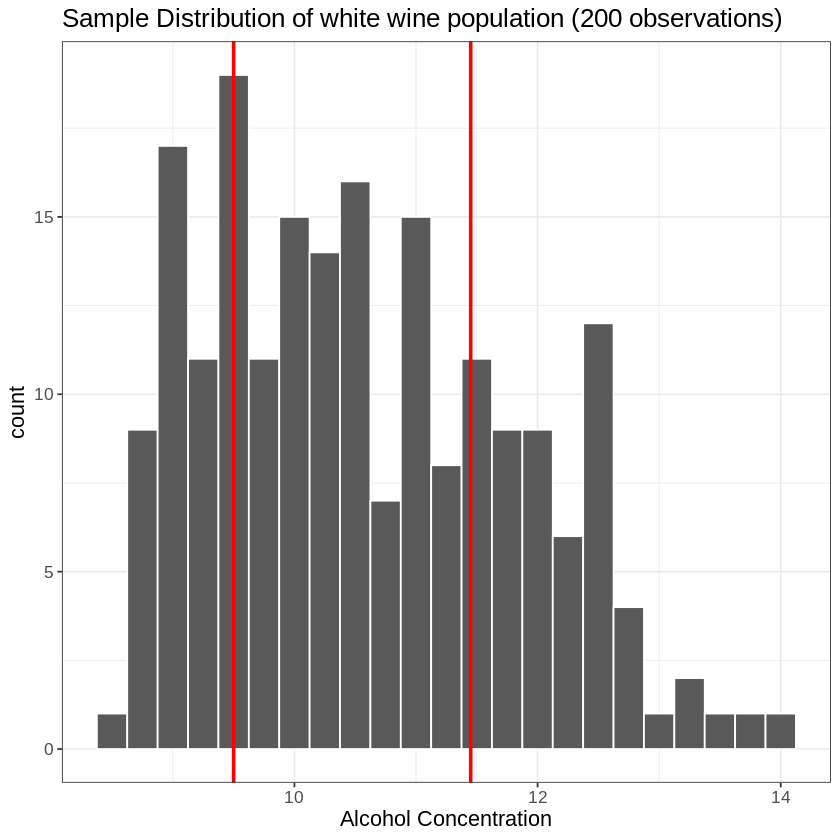

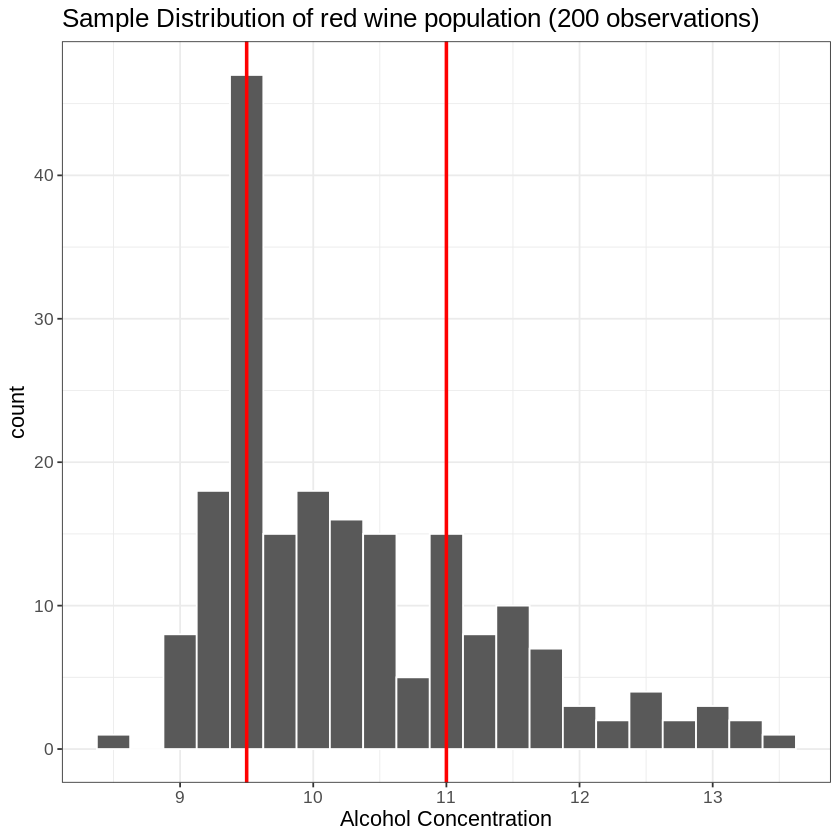

In [21]:
## Plot the distribution of the sample with quantiles 
quantile_plot <- 
    sample %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution of red wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(text = element_text(size = 13))

quantile_plot_white <- 
    sample_white %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile_white, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile_white, colour = "red", size = 1) +
    labs(title = "Sample Distribution of white wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(text = element_text(size = 13))

quantile_plot_white
quantile_plot


After examining the histograms, we can refute our previous statement, as it seems there is an usual amount of 
values around the point 9.5. It seems that the sample taken from the red wine population is slightly right-skewed, which explains the larger IQR. Therefore we are able to estimate that the variance of alcohol in red wine and alcohol in white wine are approximately the same. 

## References


Zhang, Qing-An, et al. “Preliminary Study of the Effect of Ultrasound on Physicochemical Properties of Red Wine.” CyTA - Journal of Food, vol. 14, no. 1, 2015, pp. 55–64., https://doi.org/10.1080/19476337.2015.1045036. 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Er, Yeşim. “The Classification of White Wine and Red Wine According to Their Physicochemical Qualities.” International Journal of Intelligent Systems and Applications in Engineering, vol. 4, no. Special Issue-1, 2016, pp. 23–26., https://doi.org/10.18201/ijisae.265954. 